# CNN - IMAGE SEARCH ENGINE


In [1]:
#################################
### import packages
################################

In [43]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from os import listdir
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pickle

In [44]:
###############################################
####  bring in pre-trained model (excluding top)
################################################

In [45]:
### image parameters
image_width =224
image_height =224
num_channels =3

In [46]:
#### network artitecture
vgg = VGG16(input_shape = (image_width, image_height, num_channels),
           include_top = False,
           pooling = 'avg') # for global pooling layer

model = Model(inputs = vgg.inputs, outputs = vgg.layers[-1].output)

In [47]:
### save the model
model.save('models/VGG16_search_engine.h5')

In [48]:
## summary of the model
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [49]:
##############################################
#### Preprocessing and featurising functions
###############################################

In [50]:
##### image pre-processing function

def preprocess_image(filepath):
    image =load_img(filepath,target_size = (image_width,image_height))

    image = img_to_array(image)
    image = np.expand_dims(image, axis =0)
    image = preprocess_input(image)
    
    return image

##### featurise image function

def featurise_image(image):
    feature_vector = model.predict(image)
    
    
    return feature_vector

In [51]:
###########################################
#### Featurise base images (training)
#######################################

In [52]:
###### source directory for base images
source_dir  = 'data/'

In [53]:
### empty object to append to
filename_store = []
feature_vector_store = np.empty((0,512))

In [54]:
### pass in and featurise base image set

for image in listdir(source_dir):
    
    print(image)
    
    ## append image filenames for future lookups
    filename_store.append(source_dir + image)
    
    ## preprocess the image
    preprocessed_image = preprocess_image(source_dir + image)
    
    ## extract the feature vector
    feature_vector = featurise_image(preprocessed_image)
    
    ## feature vector for similarity calculations
    feature_vector_store = np.append(feature_vector_store, feature_vector, axis =0)
    

footwear_0000.jpg
footwear_0001.jpg
footwear_0002.jpg
footwear_0003.jpg
footwear_0004.jpg
footwear_0005.jpg
footwear_0006.jpg
footwear_0007.jpg
footwear_0008.jpg
footwear_0009.jpg
footwear_0010.jpg
footwear_0011.jpg
footwear_0012.jpg
footwear_0013.jpg
footwear_0014.jpg
footwear_0015.jpg
footwear_0016.jpg
footwear_0017.jpg
footwear_0018.jpg
footwear_0019.jpg
footwear_0020.jpg
footwear_0021.jpg
footwear_0022.jpg
footwear_0023.jpg
footwear_0024.jpg
footwear_0025.jpg
footwear_0026.jpg
footwear_0027.jpg
footwear_0028.jpg
footwear_0029.jpg
footwear_0030.jpg
footwear_0031.jpg
footwear_0032.jpg
footwear_0033.jpg
footwear_0034.jpg
footwear_0035.jpg
footwear_0036.jpg
footwear_0037.jpg
footwear_0038.jpg
footwear_0039.jpg
footwear_0040.jpg
footwear_0041.jpg
footwear_0042.jpg
footwear_0043.jpg
footwear_0044.jpg
footwear_0045.jpg
footwear_0046.jpg
footwear_0047.jpg
footwear_0048.jpg
footwear_0049.jpg
footwear_0050.jpg
footwear_0051.jpg
footwear_0052.jpg
footwear_0053.jpg
footwear_0054.jpg
footwear_0

In [55]:
###  save key objects for future use
pickle.dump(filename_store, open('models/filename_store.p', 'wb'))
pickle.dump(feature_vector_store, open('models/feature_vector_store.p', 'wb'))

In [56]:
##############################################
## pass in new image and return similar images
#############################################

In [57]:
##### load in required objects
model = load_model('models/VGG16_search_engine.h5', compile = False)
filename_store = pickle.load(open('models/filename_store.p', 'rb'))
feature_vector_store = pickle.load(open('models/feature_vector_store.p', 'rb'))

In [58]:
#### search parameters
search_results_n = 8
search_image = 'search_image_01.jpg'

In [59]:
### preprocess and featurise search image
preprocessed_image = preprocess_image(search_image)
search_feature_vector = featurise_image(preprocessed_image)

In [60]:
#### instantiate nearest neighbours logic
image_neighbors = NearestNeighbors(n_neighbors = search_results_n,
                                   metric ='cosine')

In [61]:
### applt to our feature vector store
image_neighbors.fit(feature_vector_store)

NearestNeighbors(metric='cosine', n_neighbors=8)

In [62]:
### return search results for search image (distance and indices)
image_distances , image_indices = image_neighbors.kneighbors(search_feature_vector)

In [63]:
### convert closet indices and distances to a lists
image_indices = list(image_indices[0])
image_distances = list(image_distances[0])

In [64]:
## get list of filenames for search result
search_result_files = [filename_store[i] for i in image_indices]

In [65]:
search_result_files

['data/footwear_0187.jpg',
 'data/footwear_0231.jpg',
 'data/footwear_0176.jpg',
 'data/footwear_0229.jpg',
 'data/footwear_0301.jpg',
 'data/footwear_0261.jpg',
 'data/footwear_0186.jpg',
 'data/footwear_0268.jpg']

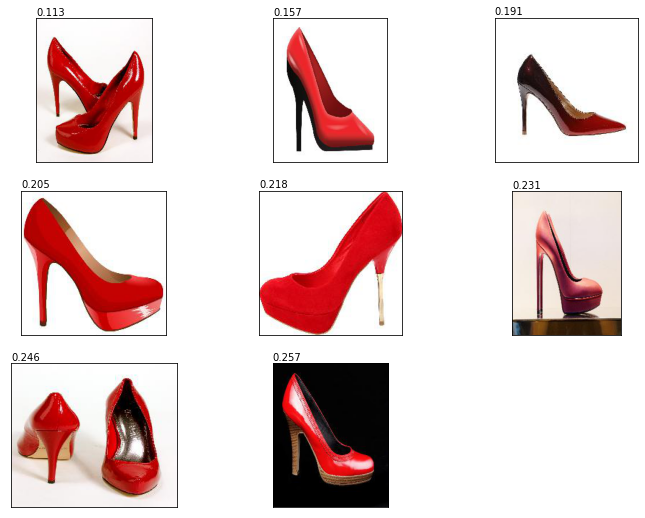

In [66]:
#### plot results

plt.figure(figsize=(12,9))
for counter, result_file in enumerate(search_result_files):    
    image = load_img(result_file)
    ax = plt.subplot(3, 3, counter+1)
    plt.imshow(image)
    plt.text(0, -5, round(image_distances[counter],3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

